In [1]:
import os

dataset_path1 = r'/kaggle/input/wound-classification/Wound_dataset copy'
dataset_path2 = r'/kaggle/input/wound-dataset/Wound_dataset'

print("Files in dataset path:")
print(os.listdir(dataset_path1))
print(os.listdir(dataset_path2))

Files in dataset path:
['Abrasions', 'Cut', 'Burns', 'Normal', 'Laseration', 'Diabetic Wounds', 'Pressure Wounds', 'Surgical Wounds', 'Bruises', 'Venous Wounds']
['Abrasions', 'Stab_wound', 'Cut', 'Burns', 'Ingrown_nails', 'Laceration', 'Bruises']


In [2]:
import os
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_path1 = "/kaggle/input/wound-classification/Wound_dataset copy"
dataset_path2 = "/kaggle/input/wound-dataset/Wound_dataset"

# Function to collect file paths and labels from a given dataset path
def collect_data(dataset_path):
    file_paths = []
    labels = []
    classes = os.listdir(dataset_path)
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for file_name in os.listdir(class_path):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_name)
    return file_paths, labels

# Collect data from both datasets
file_paths1, labels1 = collect_data(dataset_path1)
file_paths2, labels2 = collect_data(dataset_path2)

# Combine data from both datasets
all_file_paths = file_paths1 + file_paths2
all_labels = labels1 + labels2

# Split the combined data into train and test sets (80% train, 20% test)
train_files, test_files, train_labels, test_labels = train_test_split(
    all_file_paths, all_labels, test_size=0.2, random_state=42
)

# Print the number of samples in train and test sets
print(f"Number of training samples: {len(train_files)}")
print(f"Number of testing samples: {len(test_files)}")

Number of training samples: 2696
Number of testing samples: 675


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import to_categorical

# Define dataset paths
dataset_path1 = "/kaggle/input/wound-classification/Wound_dataset copy"
dataset_path2 = "/kaggle/input/wound-dataset/Wound_dataset"

# Function to preprocess images
def preprocess_image(img):
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')
    img = preprocess_input(img)  # Preprocess for ResNet50
    return img

# Function to collect file paths and labels from a given dataset path
def collect_data(dataset_path):
    file_paths = []
    labels = []
    classes = os.listdir(dataset_path)
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for file_name in os.listdir(class_path):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_name)
    return file_paths, labels

# Collect data from both datasets
file_paths1, labels1 = collect_data(dataset_path1)
file_paths2, labels2 = collect_data(dataset_path2)

# Combine data from both datasets
all_file_paths = file_paths1 + file_paths2
all_labels = labels1 + labels2

# Split the combined data into train and test sets (80% train, 20% test)
train_files, test_files, train_labels, test_labels = train_test_split(
    all_file_paths, all_labels, test_size=0.2, random_state=42
)

# Function to load and preprocess images
def load_images(file_paths, labels):
    images = []
    processed_labels = []
    class_to_index = {class_name: idx for idx, class_name in enumerate(set(labels))}
    
    for file_path, label in zip(file_paths, labels):
        img = cv2.imread(file_path)
        if img is not None:
            img = preprocess_image(img)
            images.append(img)
            processed_labels.append(class_to_index[label])
    
    return np.array(images), to_categorical(processed_labels)

# Load and preprocess training and testing data
X_train, y_train = load_images(train_files, train_labels)
X_test, y_test = load_images(test_files, test_labels)

# Print the number of samples in train and test sets
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 2696
Number of testing samples: 675


In [6]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Define dataset paths
dataset_path1 = "/kaggle/input/wound-classification/Wound_dataset copy"
dataset_path2 = "/kaggle/input/wound-dataset/Wound_dataset"

# Preprocess image
def preprocess_image(img):
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')
    img = preprocess_input(img)  # Preprocess for ResNet50
    return img

# Load and preprocess data from a given dataset path
def load_data(data_path):
    data = []
    labels = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:  # Check if the image was loaded successfully
                    img = preprocess_image(img)  # Apply preprocessing to each image
                    data.append(img)
                    labels.append(folder)
    return np.array(data), np.array(labels)

# Load data from both datasets
X1, y1 = load_data(dataset_path1)
X2, y2 = load_data(dataset_path2)

# Combine data from both datasets
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Print shapes
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (2696, 224, 224, 3)
Validation data shape: (675, 224, 224, 3)
Training labels shape: (2696, 13)
Validation labels shape: (675, 13)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 39s 259ms/step - accuracy: 0.2211 - loss: 2.7228 - val_accuracy: 0.6711 - val_loss: 1.0011 - learning_rate: 1.0000e-04
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.6875 - loss: 0.8098 - val_accuracy: 0.7837 - val_loss: 0.6728 - learning_rate: 1.0000e-04
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.8007 - loss: 0.5846 - val_accuracy: 0.8326 - val_loss: 0.5361 - learning_rate: 1.0000e-04
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8630 - loss: 0.4484 - val_accuracy: 0.8607 - val_loss: 0.4666 - learning_rate: 1.0000e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9015 - loss: 0.3659 - val_accuracy: 0.8711 - val_loss: 0.4237 - learning_rate: 1.0000e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9073 - loss: 0.3062 - val_accuracy: 0.8919 - val_loss: 0.3700 - learning_rate: 1.0000e-04
Epoch 7

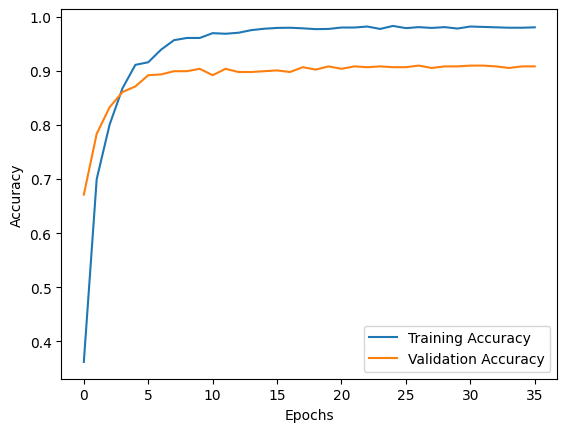

In [8]:
# Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),  # Unique classes in the training set
    y=y_train_int  # Integer training labels
)
class_weights_dict = dict(enumerate(class_weights))  # Convert to dictionary

# Load ResNet50 model (excluding the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last 10
for layer in base_model.layers[:-10]:  # Fine-tune more layers
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

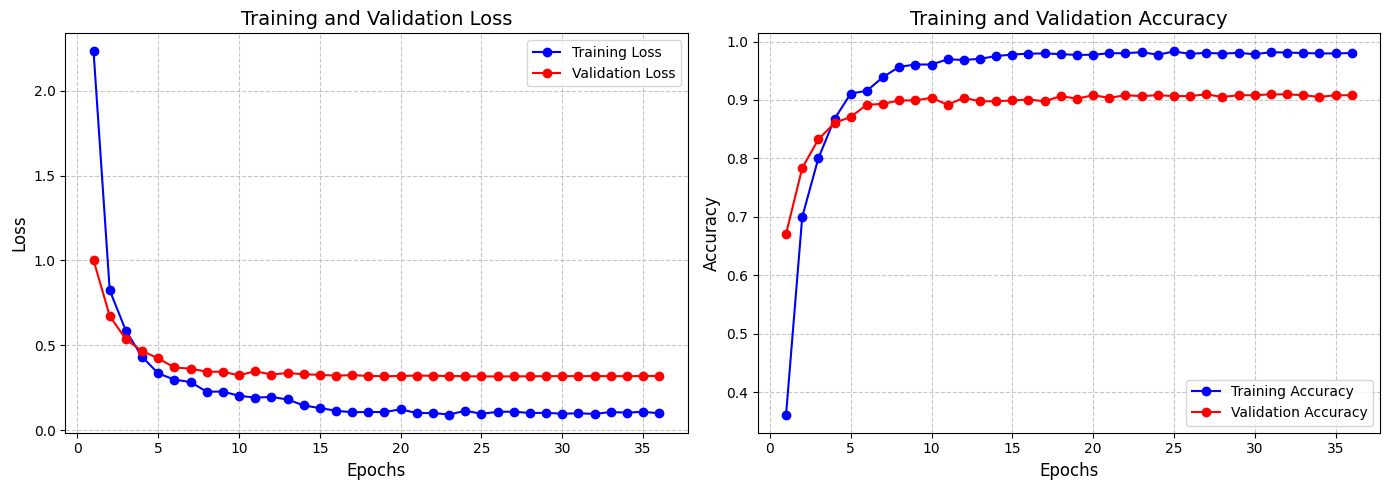

In [9]:
# Extract training and validation metrics from the history object
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.figure(figsize=(14, 5))  # Set the figure size

# Plot Loss
plt.subplot(1, 2, 1)  # Subplot for loss
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='blue', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='red', linestyle='-')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Plot Accuracy
plt.subplot(1, 2, 2)  # Subplot for accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='red', linestyle='-')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_pred = model.predict(X_val)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_val, axis=1)  # Convert one-hot encoded validation labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Identify false predictions
false_predictions = []

# Loop through all validation samples
for i in range(len(X_val)):
    if y_pred_classes[i] != y_true_classes[i]:  # Check if prediction is incorrect
        false_predictions.append((i, y_true_classes[i], y_pred_classes[i]))  # Store false prediction details

# Display false predictions
print("\nFalse Predictions:")
for idx, true_label, predicted_label in false_predictions:
    print(
        f"Index: {idx}, "
        f"True Label: {label_encoder.classes_[true_label]}, "
        f"Predicted Label: {label_encoder.classes_[predicted_label]}"
    )

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step
Classification Report:
                 precision    recall  f1-score   support

      Abrasions       1.00      0.94      0.97        47
        Bruises       0.99      1.00      0.99        81
          Burns       0.94      0.97      0.96        35
            Cut       1.00      1.00      1.00        45
Diabetic Wounds       0.89      0.90      0.89        88
  Ingrown_nails       1.00      0.89      0.94         9
     Laceration       0.00      0.00      0.00        11
     Laseration       0.22      0.18      0.20        22
         Normal       1.00      1.00      1.00        47
Pressure Wounds       0.94      0.93      0.93       121
     Stab_wound       0.83      0.71      0.77         7
Surgical Wounds       0.96      0.90      0.93        73
  Venous Wounds       0.95      0.98      0.96        89

       accuracy                           0.91       675
      macro avg       0.82      0.80      0.81       675
   weighted avg       

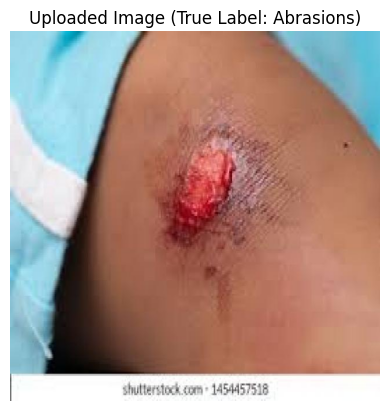

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
True Label: Abrasions
Predicted Label: Abrasions


In [11]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    """
    Preprocesses an image for prediction with ResNet50.
    - Converts BGR to RGB.
    - Resizes the image to (224, 224).
    - Normalizes the image using ResNet50's preprocess_input.
    """
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')  # Convert to float32
    img = preprocess_input(img)  # Apply ResNet50 preprocessing
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (10).jpg'

# Load the image
img = cv2.imread(img_path)

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Extract the true label from the image path
    true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img_preprocessed = preprocess_image(img)  # Apply preprocessing function
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img_preprocessed)  # Get predicted probabilities
    predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
    predicted_label = le.classes_[predicted_class_index]  # Convert index to label

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

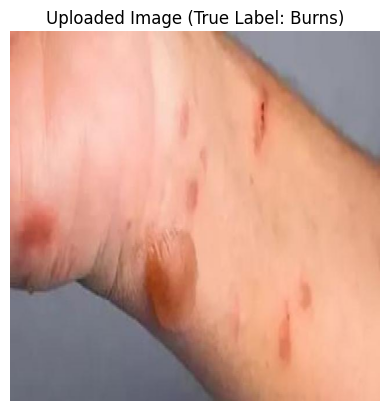

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
True Label: Burns
Predicted Label: Burns


In [12]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    """
    Preprocesses an image for prediction with ResNet50.
    - Converts BGR to RGB.
    - Resizes the image to (224, 224).
    - Normalizes the image using ResNet50's preprocess_input.
    """
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')  # Convert to float32
    img = preprocess_input(img)  # Apply ResNet50 preprocessing
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-dataset/Wound_dataset/Burns/burns (12).jpg'

# Load the image
img = cv2.imread(img_path)

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Extract the true label from the image path
    true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img_preprocessed = preprocess_image(img)  # Apply preprocessing function
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img_preprocessed)  # Get predicted probabilities
    predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
    predicted_label = le.classes_[predicted_class_index]  # Convert index to label

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

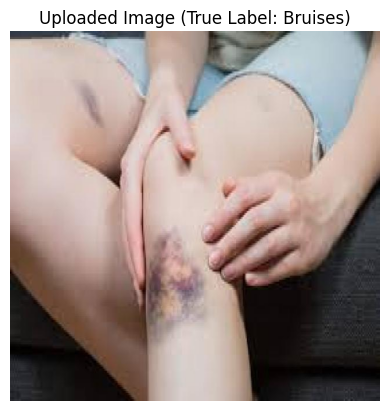

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
True Label: Bruises
Predicted Label: Bruises


In [13]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    """
    Preprocesses an image for prediction with ResNet50.
    - Converts BGR to RGB.
    - Resizes the image to (224, 224).
    - Normalizes the image using ResNet50's preprocess_input.
    """
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')  # Convert to float32
    img = preprocess_input(img)  # Apply ResNet50 preprocessing
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-dataset/Wound_dataset/Bruises/bruises (106).jpg'

# Load the image
img = cv2.imread(img_path)

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Extract the true label from the image path
    true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img_preprocessed = preprocess_image(img)  # Apply preprocessing function
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img_preprocessed)  # Get predicted probabilities
    predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
    predicted_label = le.classes_[predicted_class_index]  # Convert index to label

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

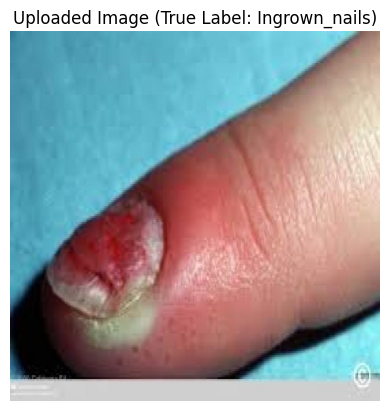

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
True Label: Ingrown_nails
Predicted Label: Ingrown_nails


In [14]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    """
    Preprocesses an image for prediction with ResNet50.
    - Converts BGR to RGB.
    - Resizes the image to (224, 224).
    - Normalizes the image using ResNet50's preprocess_input.
    """
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')  # Convert to float32
    img = preprocess_input(img)  # Apply ResNet50 preprocessing
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-dataset/Wound_dataset/Ingrown_nails/ingrown_nail (16).jpg'

# Load the image
img = cv2.imread(img_path)

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Extract the true label from the image path
    true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img_preprocessed = preprocess_image(img)  # Apply preprocessing function
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img_preprocessed)  # Get predicted probabilities
    predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
    predicted_label = le.classes_[predicted_class_index]  # Convert index to label

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


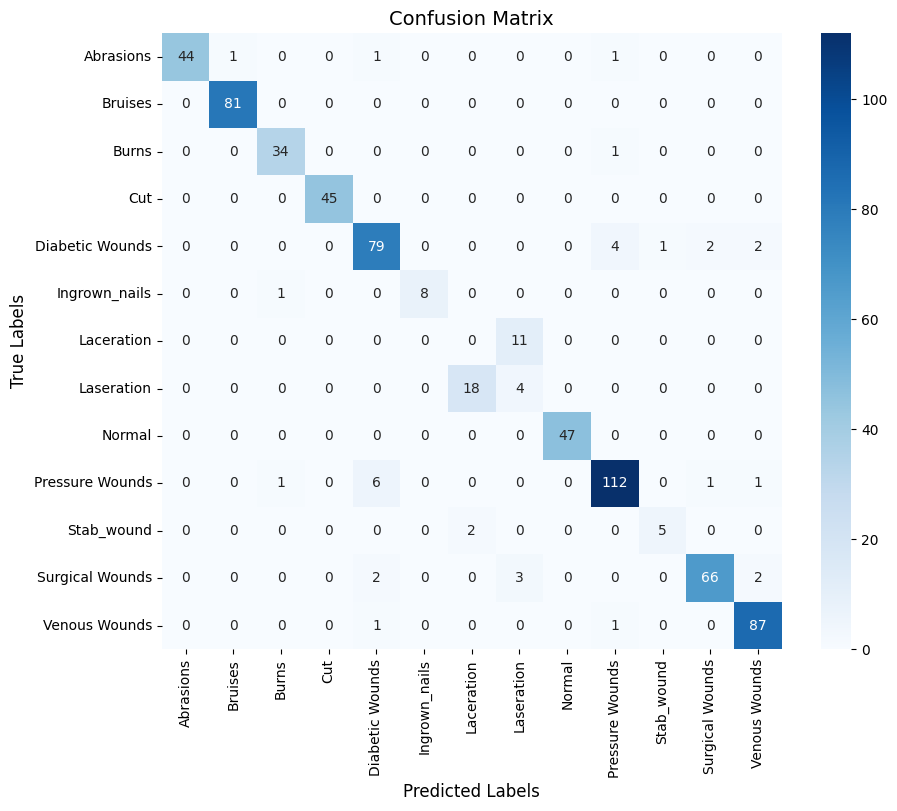

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the validation set
y_pred = model.predict(X_val)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Convert one-hot encoded validation labels to class indices
y_true_classes = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(
    cm, 
    annot=True,  # Annotate the heatmap with the actual values
    fmt='d',  # Format annotations as integers
    cmap='Blues',  # Use a blue color map
    xticklabels=label_encoder.classes_,  # Use class names for x-axis
    yticklabels=label_encoder.classes_  # Use class names for y-axis
)
plt.xlabel('Predicted Labels', fontsize=12)  # Label for x-axis
plt.ylabel('True Labels', fontsize=12)  # Label for y-axis
plt.title('Confusion Matrix', fontsize=14)  # Title of the plot
plt.show()  # Display the plot

In [16]:
# Save the model in .h5 format
model.save('Collected and Categorized Wound Images.h5')
print("Model saved as 'Collected and Categorized Wound Images.h5'")

Model saved as 'Collected and Categorized Wound Images.h5'
